# Random Signals and LTI-Systems

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Auto-Correlation Function

The auto-correlation function (ACF) $\varphi_{yy}[\kappa]$ of the output signal of an LTI system $y[k] = \mathcal{H} \{ x[k] \}$ is derived. It is assumed that the input signal is a wide-sense stationary (WSS) real-valued random process and that the LTI system has a real-valued impulse repsonse $h[k] \in \mathbb{R}$. 

Introducing the output relation $y[k] = h[k] * x[k]$ of an LTI system into the definition of the ACF and rearranging terms yields

\begin{equation}
\begin{split}
\varphi_{yy}[\kappa] &= E \{ y[k+\kappa] \cdot y[k] \} \\
&= E \left\{  \sum_{\mu = -\infty}^{\infty} h[\mu] \; x[k+\kappa-\mu] \cdot 
\sum_{\nu = -\infty}^{\infty} h[\nu] \; x[k-\nu] \right\} \\
&= \underbrace{h[\kappa] * h[-\kappa]}_{\varphi_{hh}[\kappa]} * \varphi_{xx}[\kappa]
\end{split}
\end{equation}

where the ACF $\varphi_{hh}[\kappa]$ of the deterministic impulse response $h[k]$ is commonly termed as *filter ACF*. This is related to the [link between ACF and convolution](../random_signals/correlation_functions.ipynb#Definition). The relation above is known as the *Wiener-Lee theorem*. It states that the ACF of the output $\varphi_{yy}[\kappa]$ of an LTI system is given by the convolution of the input signal's ACF $\varphi_{xx}[\kappa]$ with the filter ACF $\varphi_{hh}[\kappa]$. For a system which just attenuates the input signal $y[k] = A \cdot x[k]$ with $A \in \mathbb{R}$, the ACF at the output is given as $\varphi_{yy}[\kappa] = A^2 \cdot \varphi_{xx}[\kappa]$.

### Example - System Response to White Noise

Let's assume that the wide-sense ergodic input signal $x[k]$ of an LTI system with impulse response $h[k] = \text{rect}_N[k]$ is normal distributed white noise. Introducing $\varphi_{xx}[\kappa] = N_0\, \delta[\kappa]$ and $h[k]$ into the Wiener-Lee theorem yields

\begin{equation}
\varphi_{yy}[\kappa] = N_0 \cdot \varphi_{hh}[\kappa] = N_0 \cdot (\text{rect}_N[\kappa] * \text{rect}_N[-\kappa])
\end{equation}

The example is evaluated numerically for $N_0 = 1$ and $N=5$

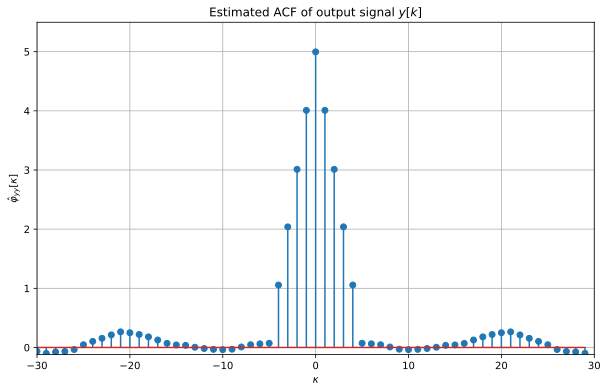

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 10000  # number of samples
K = 30  # limit for lags in ACF

# generate input signal (white Gaussian noise)
np.random.seed(2)
x = np.random.normal(size=L)
# compute system response
y = np.convolve(x, [1, 1, 1, 1, 1], mode='full')

# compute and truncate ACF
acf = 1/len(y) * np.correlate(y, y, mode='full')
acf = acf[len(y)-K-1:len(y)+K-1]
kappa = np.arange(-K, K)

# plot ACF
plt.figure(figsize=(10, 6))
plt.stem(kappa, acf, use_line_collection=True)
plt.title('Estimated ACF of output signal $y[k]$')
plt.ylabel(r'$\hat{\varphi}_{yy}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([-K, K, 1.2*min(acf), 1.1*max(acf)])
plt.grid()

**Exercise**

* Derive the theoretic result for $\varphi_{yy}[\kappa]$ by calculating the filter-ACF $\varphi_{hh}[\kappa]$.
* Why is the estimated ACF $\hat{\varphi}_{yy}[\kappa]$ of the output signal not exactly equal to its theoretic result $\varphi_{yy}[\kappa]$?
* Change the number of samples `L` and rerun the example. What changes?

Solution: The filter-ACF is given by $\varphi_{hh}[\kappa] = \text{rect}_N[\kappa] * \text{rect}_N[-\kappa]$. The convolution of two rectangular signals $\text{rect}_N[\kappa]$ results in a triangular signal. Taking the time reversal into account yields

\begin{equation}
\varphi_{hh}[\kappa] = \begin{cases} 
N - |\kappa| & \text{for } -N < \kappa \leq N \\
0 & \text{otherwise}
\end{cases}
\end{equation}

for even $N$. The estimated ACF $\hat{\varphi}_{yy}[\kappa]$ differs from its theoretic value due to the statistical uncertainties when using random signals of finite length. Increasing its length `L` lowers the statistical uncertainties.

## Cross-Correlation Function

The cross-correlation functions (CCFs) $\varphi_{xy}[\kappa]$ and $\varphi_{yx}[\kappa]$ between the in- and output signal of an LTI system $y[k] = \mathcal{H} \{ x[k] \}$ are derived. As for the ACF it is assumed that the input signal originates from a wide-sense stationary real-valued random process and that the LTI system's impulse response is real-valued, i.e. $h[k] \in \mathbb{R}$.

Introducing the convolution into the definition of the CCF and rearranging the terms yields

\begin{equation}
\begin{split}
\varphi_{xy}[\kappa] &= E \{ x[k+\kappa] \cdot y[k] \} \\
&= E \left\{ x[k+\kappa] \cdot \sum_{\mu = -\infty}^{\infty} h[\mu] \; x[k-\mu] \right\} \\
&= \sum_{\mu = -\infty}^{\infty} h[\mu] \cdot E \{ x[k+\kappa] \cdot x[k-\mu] \} \\
&= h[-\kappa] * \varphi_{xx}[\kappa]
\end{split}
\end{equation}

The CCF $\varphi_{xy}[\kappa]$ between in- and output is given as the time-reversed impulse response of the system convolved with the ACF of the input signal. 

The CCF between out- and input is yielded by taking the symmetry relations of the CCF and ACF into account

\begin{equation}
\varphi_{yx}[\kappa] = \varphi_{xy}[-\kappa] = h[\kappa] * \varphi_{xx}[\kappa]
\end{equation}

The CCF $\varphi_{yx}[\kappa]$ between out- and input is given as the impulse response of the system convolved with the ACF of the input signal. 

For a system which just attenuates the input signal $y[k] = A \cdot x[k]$, the CCFs between input and output are given as $\varphi_{xy}[\kappa] = A \cdot \varphi_{xx}[\kappa]$ and $\varphi_{yx}[\kappa] = A \cdot \varphi_{xx}[\kappa]$.

## System Identification by Cross-Correlation

The process of determining the impulse response or transfer function of a system is referred to as *system identification*. The CCFs of an LTI system play an important role in the estimation of the impulse response $h[k]$ of an unknown system. This is illustrated in the following.

The basic idea is to use a specific measurement signal as input signal to the system. Let's assume that the unknown LTI system is excited by [white noise](../random_signals/white_noise.ipynb). The ACF of the wide-sense stationary input signal $x[k]$ is then given as $\varphi_{xx}[\kappa] = N_0 \cdot \delta[\kappa]$. According to the relation derived above, the CCF between out- and input for this special choice of the input signal becomes

\begin{equation}
\varphi_{yx}[\kappa] = h[\kappa] * N_0 \cdot \delta[\kappa] = N_0 \cdot h[\kappa]
\end{equation}

For white noise as input signal $x[k]$, the impulse response of an LTI system can be estimated by estimating the CCF between its out- and input signals. Using noise as measurement signal instead of a Dirac impulse is beneficial since its [crest factor](https://en.wikipedia.org/wiki/Crest_factor) is limited.

### Example

The application of the CCF to the identification of a system is demonstrated. The system is excited by wide-sense ergodic normal distributed white noise with $N_0 = 1$. The ACF of the in- and output, as well as the CCF between out- and input is estimated and plotted.

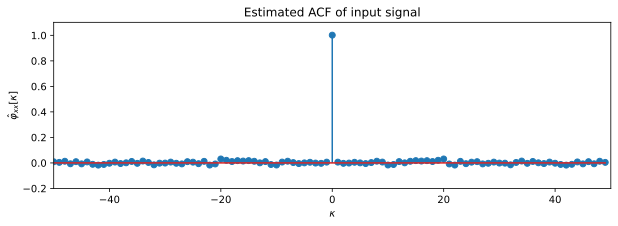

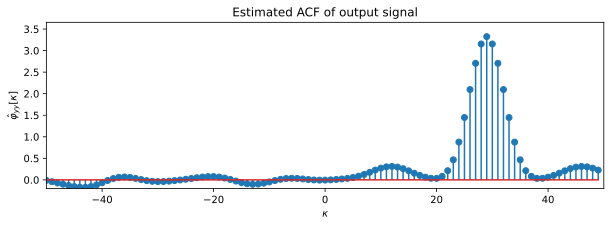

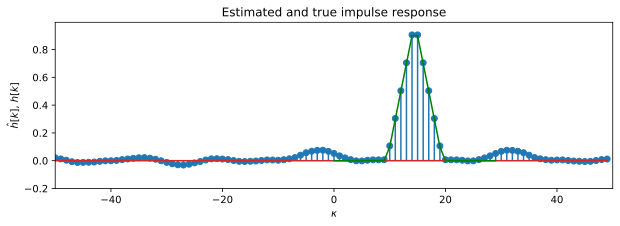

In [2]:
import scipy.signal as sig

N = 10000  # number of samples for input signal
K = 50  # limit for lags in ACF

# generate input signal
# normally distributed (zero-mean, unit-variance) white noise
np.random.seed(5)
x = np.random.normal(size=N)
# impulse response of the system
h = np.concatenate((np.zeros(10), sig.triang(10), np.zeros(10)))
# output signal by convolution
y = np.convolve(h, x, mode='full')

# compute correlation functions
acfx = 1/len(x) * np.correlate(x, x, mode='full')
acfy = 1/len(y) * np.correlate(y, y, mode='full')
ccfyx = 1/len(y) * np.correlate(y, x, mode='full')


def plot_correlation_function(cf):
    '''Plot correlation function.'''
    cf = cf[N-K-1:N+K-1]
    kappa = np.arange(-len(cf)//2, len(cf)//2)
    plt.stem(kappa, cf, use_line_collection=True)
    plt.xlabel(r'$\kappa$')
    plt.axis([-K, K, -0.2, 1.1*max(cf)])


# plot ACFs and CCF
plt.rc('figure', figsize=(10, 3))
plt.figure()
plot_correlation_function(acfx)
plt.title('Estimated ACF of input signal')
plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')

plt.figure()
plot_correlation_function(acfy)
plt.title('Estimated ACF of output signal')
plt.ylabel(r'$\hat{\varphi}_{yy}[\kappa]$')

plt.figure()
plot_correlation_function(ccfyx)
plt.plot(np.arange(len(h)), h, 'g-')
plt.title('Estimated and true impulse response')
plt.ylabel(r'$\hat{h}[k]$, $h[k]$');

**Exercise**

* Why is the estimated CCF $\hat{\varphi}_{yx}[k]$ not exactly equal to the true impulse response $h[k]$ of the system?
* What changes if you change the number of samples `N` of the input signal?

Solution: The derived relations for system identification hold for the case of a wide-sense ergodic input signal of infinite duration. Since we can only numerically simulate signals of finite duration, the observed deviations are a result of the resulting statistical uncertainties. Increasing the length `N` of the input signal improves the estimate of the impulse response.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.